In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mdf = pd.read_csv("combined_maker_level_dataset.csv")
sdf = pd.read_csv("combined_state_level_dataset.csv")

In [3]:
mdf.info()
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    816 non-null    object
 1   vehicle_category        816 non-null    object
 2   maker                   816 non-null    object
 3   electric_vehicles_sold  816 non-null    int64 
 4   fiscal_year             816 non-null    int64 
 5   quarter                 816 non-null    object
dtypes: int64(2), object(4)
memory usage: 38.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    2445 non-null   object 
 1   state                   2445 non-null   object 
 2   vehicle_category        2445 non-null   object 
 3   electric_vehicles_sold  2445 non-null   int64  
 4   

In [5]:
mdf.shape
sdf.shape

(2445, 8)

In [7]:

sdf.isna().sum()


date                        0
state                       0
vehicle_category            0
electric_vehicles_sold      0
total_vehicles_sold         0
fiscal_year                 0
quarter                     0
No. of Operational PCS    144
dtype: int64

In [8]:
mdf.isna().sum()


date                      0
vehicle_category          0
maker                     0
electric_vehicles_sold    0
fiscal_year               0
quarter                   0
dtype: int64

In [9]:
sdf.describe()

,electric_vehicles_sold,total_vehicles_sold,fiscal_year,No. of Operational PCS
count,2445.000000,2445.000000,2445.000000,2301.000000
mean,845.035174,23402.966053,2022.999591,364.801825
std,2185.167744,38353.266389,0.816413,624.035919
min,0.000000,1.000000,2022.000000,1.000000
25%,2.000000,1158.000000,2022.000000,21.000000
50%,54.000000,6098.000000,2023.000000,124.000000
75%,534.000000,29396.000000,2024.000000,476.000000
max,26668.000000,387983.000000,2024.000000,3079.000000


In [10]:
mdf.describe()

,electric_vehicles_sold,fiscal_year
count,816.000000,816.000000
mean,2531.998775,2023.014706
std,4771.077333,0.813855
min,0.000000,2022.000000
25%,42.000000,2022.000000
50%,662.000000,2023.000000
75%,2636.500000,2024.000000
max,44630.000000,2024.000000


data cleaning

In [12]:
sdf['date'] = pd.to_datetime(sdf['date'])
mdf['date'] = pd.to_datetime(mdf['date'])

In [14]:
sdf.rename(
    columns={'No. of Operational PCS': 'operational_pcs'},
    inplace=True
)

In [15]:
sdf['operational_pcs'].isna().sum()

np.int64(144)

In [16]:
sdf['operational_pcs'] = sdf['operational_pcs'].fillna(0)

In [17]:
text_cols_state = ['state', 'vehicle_category']
text_cols_maker = ['maker', 'vehicle_category']

for col in text_cols_state:
    sdf[col] = sdf[col].str.strip()

for col in text_cols_maker:
    mdf[col] = mdf[col].str.strip()

In [18]:
 sdf.duplicated().sum()
 mdf.duplicated().sum()

np.int64(0)

In [20]:
sdf.drop_duplicates(inplace=True)
mdf.drop_duplicates(inplace=True)


In [21]:
sdf.info()
mdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    2445 non-null   datetime64[ns]
 1   state                   2445 non-null   object        
 2   vehicle_category        2445 non-null   object        
 3   electric_vehicles_sold  2445 non-null   int64         
 4   total_vehicles_sold     2445 non-null   int64         
 5   fiscal_year             2445 non-null   int64         
 6   quarter                 2445 non-null   object        
 7   operational_pcs         2445 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 152.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  --

In [22]:
sdf['year'] = sdf['date'].dt.year
sdf['month'] = sdf['date'].dt.month

mdf['year'] = mdf['date'].dt.year
mdf['month'] = mdf['date'].dt.month

In [23]:
mdf.head()

,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year,quarter,year,month
0,2021-04-01,2-Wheelers,OLA ELECTRIC,0,2022,Q1,2021,4
1,2022-04-01,2-Wheelers,OKAYA EV,0,2023,Q1,2022,4
2,2021-05-01,2-Wheelers,OLA ELECTRIC,0,2022,Q1,2021,5
3,2021-06-01,2-Wheelers,OLA ELECTRIC,0,2022,Q1,2021,6
4,2021-07-01,2-Wheelers,OLA ELECTRIC,0,2022,Q2,2021,7


In [24]:
sdf.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year,quarter,operational_pcs,year,month
0,2021-04-01,Sikkim,2-Wheelers,0,398,2022,Q1,2.0,2021,4
1,2021-04-01,Sikkim,4-Wheelers,0,361,2022,Q1,2.0,2021,4
2,2021-05-01,Sikkim,2-Wheelers,0,113,2022,Q1,2.0,2021,5
3,2021-05-01,Sikkim,4-Wheelers,0,98,2022,Q1,2.0,2021,5
4,2021-06-01,Sikkim,2-Wheelers,0,229,2022,Q1,2.0,2021,6


In [27]:
sdf['ev_penetration_rate'] = np.where(
    sdf['total_vehicles_sold'] > 0,
    sdf['electric_vehicles_sold'] / sdf['total_vehicles_sold'],
    0
)

In [28]:
state_monthly = (
    sdf
    .groupby(['year', 'month', 'state', 'vehicle_category'], as_index=False)
    .agg({
        'electric_vehicles_sold': 'sum',
        'total_vehicles_sold': 'sum',
        'operational_pcs': 'mean'
    })
)

In [29]:
maker_monthly = (
    mdf
    .groupby(['year', 'month', 'maker', 'vehicle_category'], as_index=False)
    .agg({
        'electric_vehicles_sold': 'sum'
    })
)

In [30]:
state_monthly['ev_penetration_rate'] = np.where(
    state_monthly['total_vehicles_sold'] > 0,
    state_monthly['electric_vehicles_sold'] / state_monthly['total_vehicles_sold'],
    0
)


In [31]:
state_monthly.head()


,year,month,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,operational_pcs,ev_penetration_rate
0,2021,4,Andaman & Nicobar Islands,2-Wheelers,0,515,3.0,0.000000
1,2021,4,Andaman & Nicobar Islands,4-Wheelers,9,168,3.0,0.053571
2,2021,4,Andhra Pradesh,2-Wheelers,436,63444,327.0,0.006872
3,2021,4,Andhra Pradesh,4-Wheelers,26,7837,327.0,0.003318
4,2021,4,Arunachal Pradesh,2-Wheelers,0,1256,9.0,0.000000


In [32]:
maker_monthly.head()


,year,month,maker,vehicle_category,electric_vehicles_sold
0,2021,4,AMPERE,2-Wheelers,751
1,2021,4,ATHER,2-Wheelers,903
2,2021,4,BAJAJ,2-Wheelers,48
3,2021,4,BEING,2-Wheelers,171
4,2021,4,BMW India,4-Wheelers,0


EV Sales Trend by Vehicle Category

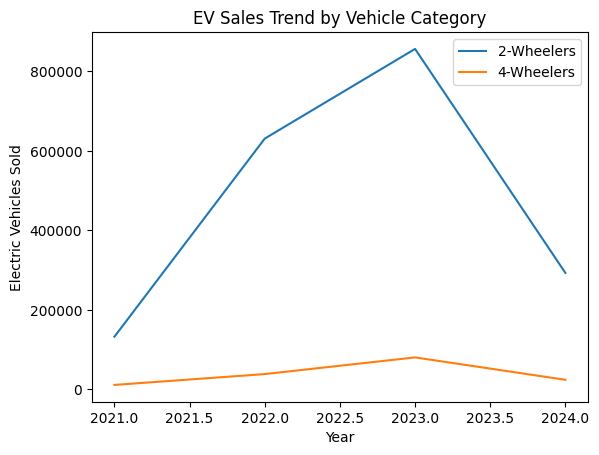

In [34]:
plt.figure()

category_trend = (
    sdf
    .groupby(['year', 'vehicle_category'], as_index=False)['electric_vehicles_sold']
    .sum()
)

for cat in category_trend['vehicle_category'].unique():
    data = category_trend[category_trend['vehicle_category'] == cat]
    plt.plot(data['year'], data['electric_vehicles_sold'], label=cat)

plt.xlabel("Year")
plt.ylabel("Electric Vehicles Sold")
plt.title("EV Sales Trend by Vehicle Category")
plt.legend()
plt.show()


Top 5 States EV Sales Trend

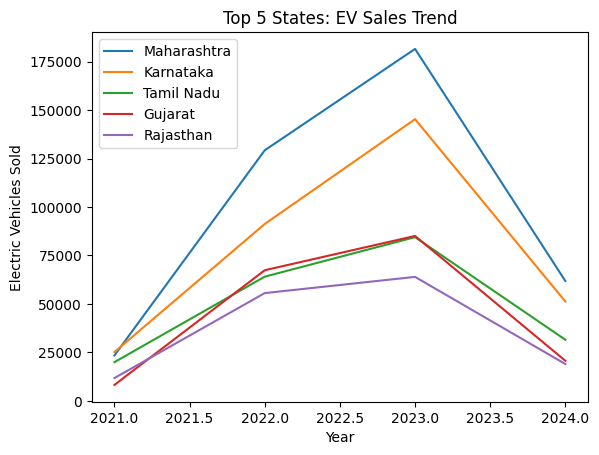

In [36]:
top5_states = (
    sdf.groupby('state')['electric_vehicles_sold']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

plt.figure()

for st in top5_states:
    data = (
        sdf[sdf['state'] == st]
        .groupby('year', as_index=False)['electric_vehicles_sold']
        .sum()
    )
    plt.plot(data['year'], data['electric_vehicles_sold'], label=st)

plt.xlabel("Year")
plt.ylabel("Electric Vehicles Sold")
plt.title("Top 5 States: EV Sales Trend")
plt.legend()
plt.show()


Distribution of EV Penetration Rate

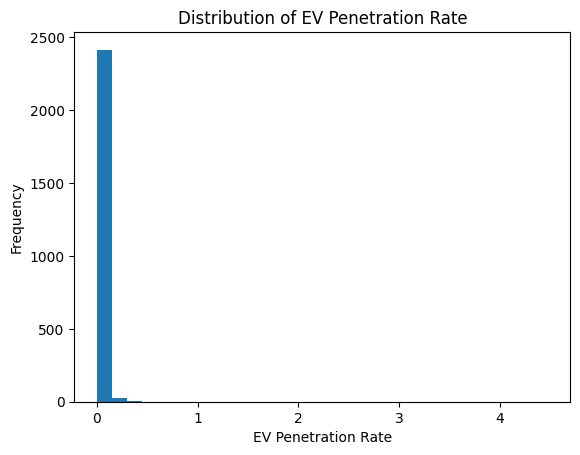

In [38]:
plt.figure()
plt.hist(sdf['ev_penetration_rate'], bins=30)
plt.xlabel("EV Penetration Rate")
plt.ylabel("Frequency")
plt.title("Distribution of EV Penetration Rate")
plt.show()


Top 5 EV Makers Sales Trend

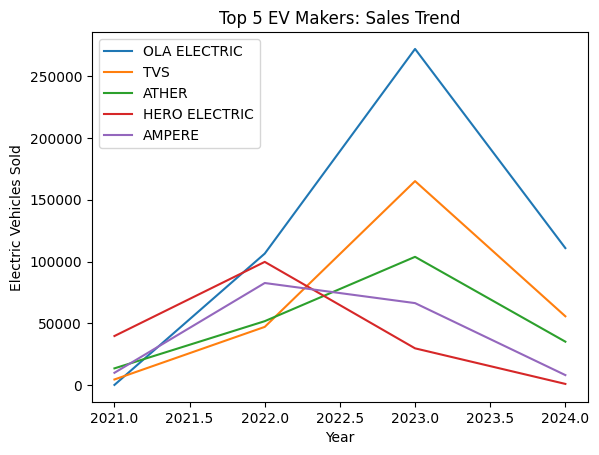

In [40]:
top5_makers = (
    mdf.groupby('maker')['electric_vehicles_sold']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

plt.figure()

for mk in top5_makers:
    data = (
        mdf[mdf['maker'] == mk]
        .groupby('year', as_index=False)['electric_vehicles_sold']
        .sum()
    )
    plt.plot(data['year'], data['electric_vehicles_sold'], label=mk)

plt.xlabel("Year")
plt.ylabel("Electric Vehicles Sold")
plt.title("Top 5 EV Makers: Sales Trend")
plt.legend()
plt.show()


EV Sales vs Charging Infrastructure

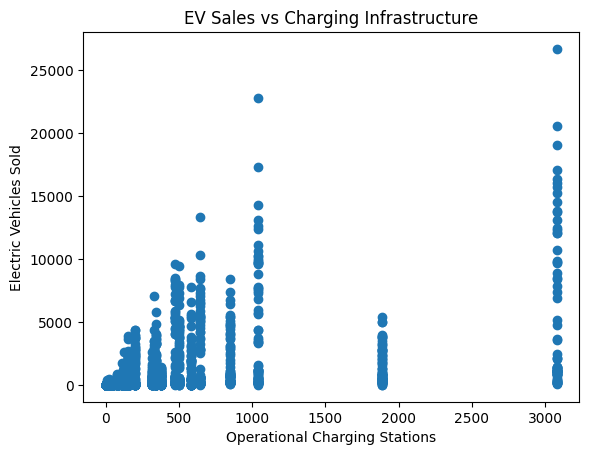

In [42]:
plt.figure()
plt.scatter(sdf['operational_pcs'], sdf['electric_vehicles_sold'])
plt.xlabel("Operational Charging Stations")
plt.ylabel("Electric Vehicles Sold")
plt.title("EV Sales vs Charging Infrastructure")
plt.show()
